# Set-up

Dear students,

We approach the time-series modeling part as follows. First, you learn about ARMA models. Second, you learn how to siumulate these. Third, you learn how to estimate these. These estimations will lead us into the machine learning aspects of our course.

The current problem set does therefore NOT talk about the simulation, nor the estimation of ARMA models. As we do not yet talk about the machine learning aspects, we will rely heavily on Python packages. 

Today, we do the following. I give you a time series of interest rate data, "GovBondYields.xls". The data is annualized and in percentage terms. These are US government bond yields of maturity 3, 6, 12, 24, 36, 60, 84 and 120 months. The frequency of the data is monthly. You are asked to analyze which auto-regressive lag structure does best fit the 3-month and 120-month interest rate.

While you work through the work sheet you will learn about different data tools to answer the question. In particular, you will learn about

$$
\\
$$

- using a Python package to run a so called PACF test (partial auto-correlation function test)

- using a Python package to run a so called AIC test (Akaike Information Criterium)

- using Python to implement a so called BIC test (Bayesian Information Criterium)

# Background Information 

Class notes have shown you how to use AR(p) models to estimate a return density. You have NOT yet learned how to estimate the AR(p) parametrization, yet, from you stats classes, you might guess that you could use OLS or MLE to do so. We will refresh that later in the course. For now, we will ask the question, "how can a data scientist determine the value of **p** that best describes data?". As you work through this work sheet, you will learn about three methods. These are applicable to any type of data. Your example will be taken from finance data.

$$
\\
$$

- PACF test

- AIC test

- BIC test.

The PACF test is a regression based test. The other two are likelihood tests. Please be reminded, we talk in detail about regression and likelihood learning in week 8 to week 12.  

## PACF Test

The PACF test is particularly intuitive. Take a time-series of interest and set a maximal lag length (maximal p). We call the former 

$$
\{r_t\}_t
$$

and the latter 

$$
p_{max}.
$$

Next, fit $\{r_t\}_t$ in consecutive order to an $AR(1), AR(2), ..., AR(p_{max})$ model. You can use regression techniques for that. For each estimation, record the t-statistic of the LAST parameter estimate, i.e. $ \hat{\Phi}_{1,1},\hat{\Phi}_{2,2},...,\hat{\Phi}_{p_{max},p_{max}}$, where the first index represents the AR model that you fit, while the second index stands for the respective auto-correlation coefficient. For instance, $\hat{\Phi}_{2,2}$ stands for the auto-regressive coefficient of lag length 2 that you estimate from an AR(2) model. The following math representation helps:

$$r_t \overbrace{=}^{AR(1)} \Phi_{0,1} + \sum_{j=1}^{1} \Phi_{1,j}  \,r_{t-j} + \epsilon_{1,t}$$
$$r_t \overbrace{=}^{AR(2)} \Phi_{0,2} + \sum_{j=1}^{2} \Phi_{2,j} \, r_{t-j} + \epsilon_{2,t}$$
$$...$$
$$r_t \overbrace{=}^{AR(p_{max})} \Phi_{0,p_{max}} + \sum_{j=1}^{p_{max}} \Phi_{p_{max},\,j} \, r_{t-j} + \epsilon_{p_{max}, \, t}$$

 

Given the early state of our BSc class, I will introduce you to a Python package that does all of that for you. For now, you only have to use the package properly and to interpret results.





### Python's Package for PACF Test

You can import a "plot_pacf" function from Python's statsmodels.graphics.tsaplots package. More information is here: https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html#statsmodels-tsa-stattools-pacf

Work with the following test specification: (i) $p_{max} = 5$, (ii) estimation approach is OLS, (iii) instead of the t-stat, you use the 95\% confidence interval of the estimates $\hat{\Phi}_{i,i}$ to decide whether or not lag length "i" is statistically significant.  

Notice, the first bar at position x=0 describes the "hypothetical" 0-lag coefficeint, which is of course always equal to 1 and which you can ignore. You start to look at the vertical bars at positions x=1, x=2 up to $x=p_{max}$, which report the OLS estimates for $\hat{\Phi}_{1,1}$, $\hat{\Phi}_{2,2}$ up to $\hat{\Phi}_{p_{max}, p_{max}}$, respectively. If an estimate reaches above the confidence interval, it is statistically significant. 

**Task (1):** Do interest rates of different maturities share little or strong co-movement. Hint: plot the interest rate data.  

**Task (2):** How large is the correlation between the 3-month and the 120-month interest rate?

**Task (3) - not graded:** Provide an educated guess for the magnitude of the solution to Task (2).
 
**Task (4):** Use the PACF plot to advise which AR(p) model fits 3-month and 120-month government bond yields best. To solve the problem, write down which lags are significant for the 3- and the 120-month interest rate

In [1]:
p_max = 5
est_method = 'ols'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
returns = pd.read_excel('GovBondYields.xls', index_col=0)
assert returns.index.is_monotonic_increasing

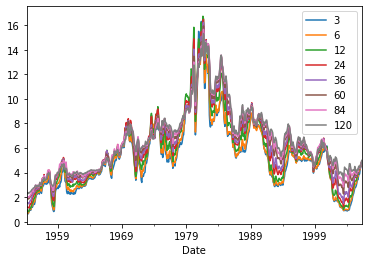

In [4]:
_ = returns.plot() 

In [5]:
#returns = returns.apply(lambda x: np.log(x.shift()) - np.log(x)).dropna()

In [6]:
returns.head()

,3,6,12,24,36,60,84,120
Date,,,,,,,,
1954-04-01,0.97,0.940464,0.96,1.209220,1.54,1.87,1.929210,2.29
1954-05-01,0.76,0.767847,0.85,1.183784,1.56,1.92,1.974341,2.37
1954-06-01,0.64,0.687447,0.82,1.174206,1.53,1.92,2.046101,2.38
1954-07-01,0.72,0.745219,0.84,1.141956,1.47,1.85,1.990559,2.30
1954-08-01,0.92,0.876895,0.88,1.130205,1.49,1.90,2.024843,2.36


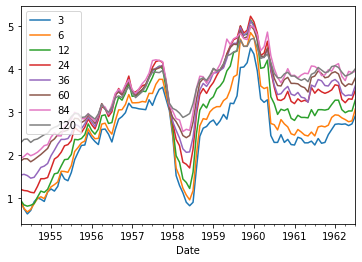

In [7]:
returns[:100].plot()

**Task (1)**: The interest rates of different maturities share strong co-movement.

In [8]:
returns[[3, 120]].corr()

,3,120
3,1.000000,0.907432
120,0.907432,1.000000


**Task (2)**: The correlation between the 3-month and 120-month interest rate is 0.91.

In [9]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [10]:
actual_values = pacf(returns.loc[:, 3], nlags=p_max, method=est_method)
print(actual_values)

[ 1.          0.98521505 -0.34318854  0.20253518 -0.02743625  0.00557722]


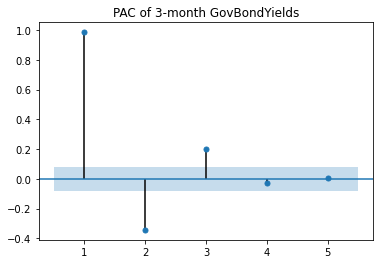

In [11]:
_ = plot_pacf(returns.loc[:, 3], lags=p_max, method=est_method, title='PAC of 3-month GovBondYields', zero=False)

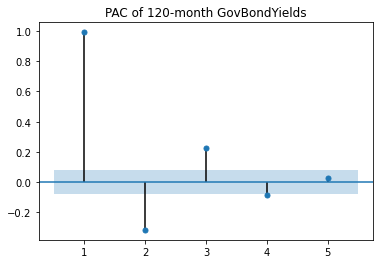

In [12]:
_ = plot_pacf(returns.loc[:, 120], lags=p_max, method=est_method, title='PAC of 120-month GovBondYields', zero=False)

**Task(4)**: For the 3-month GovBondYields a **AR(3)** model is best and for the 120-GovBondYields a **AR(3)** model.

## AIC Test

The AIC test is a likelihood test. AR models of different lag length are independently fit using MLE (we talk about that later in the course), and their respective optimal log likelihood value is recorded. Naturally, the more parameters you have, the higher the likelihood. That is not fair and prone to overfitting. Hence, the AIC penalizes the number of parameters by the term

$$
- \frac{2}{T} p
$$
where $p$ is the lag length of the AR(p) process. The more parameters (the higher p), the larger the penalty onto the optimal likelihood.

Notice, the AIC for a model with p parameters is defined as

$$AIC(p) := \frac{-2}{T}ln(L) + \frac{2}{T}\cdot p.$$
    
Note, how it is defind in terms of the negative log likelihood and negative penalty. Hence, the best model has the LOWEST AIC.

As we are not yet in the machine learning part of our BSc course, we use a Python package for the AIC. Note, the package assumes the residual to be Gaussian, which allows the package to write down the likelihood and to find the optimal parameter estimte for a particular AR(p) model. Later in our BSc course, we do that explicitly ourselves. 

### Python Package for AIC Test

We work with Python's statsmodels.tsa.ar_model package. See https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html

After loading the package, you have to set-up an "ar model". You do that by calling "ar_model.AR(xxx)" where xxx is a numpy array that contains your time series of the interest rate. Next, you fit the "ar model" for the time series "xxx"  by using the "ar model . fit()" function. Choose "MLE" as the estimation method and maxlags of $p_{max}$. The function ".k_ar" gives you the optimal lag length.

**Task (5):** Use the AIC criterium to advise which AR(p) model fits 3-month and 120-month government bond yields best. To solve the problem, write down the optimal AIC lag length for both interest rates.

In [13]:
from statsmodels.tsa import ar_model

In [14]:
ar = ar_model.AR(returns[3].values)
ar_fit = ar.fit(method='MLE', maxlag=p_max, ic='aic')

D:\Adrian\envs\finance\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [15]:
ar_fit.k_ar

3

In [16]:
ar = ar_model.AR(returns[120].values)
ar_fit = ar.fit(method='MLE', maxlag=p_max, ic='aic')
ar_fit.k_ar

4

**Task (5)**: \
Optimal AIC lag length for 3-month gov bond yields: 3 \
Optimal AIC lag length for 120-month gov bond yields: 4 \
As we can see, these results coincide with those obtained by using the pacf plot.

## BIC Test

The BIC test is another likelihood based test. It stands for Bayesian information criterium. The key difference to the AIC is the penalty term. It reads 

$$
-\frac{ln T}{p}.
$$

Hence, for $ln(T) > 2$, which says for more than 7 observations, the BIC penalty is larger than the AIC penalty. This implies already that the BIC tends to propse lower parameterized models.

In summary, the BIC for model with p parameters is defined as

$$BIC(p) := \frac{-2}{T}ln(L) + \frac{ln(T)}{T}\cdot p$$.
    
Note, the BIC is defined in terms of the negative log-likelihood and the negative penalty term. Hence, you want to choose models with the lowest BIC.

### Python Package for BIC

We use the Python package that we used for AIC. The only difference is that you have to pick the information criterium to be BIC, i.e. "ic = bic"

**Task (6):** Use the BIC criterium to advise which AR(p) model fits 3-month and 120-month government bond yields best. To solve the problem, write down the optimal AIC lag length for both interest rates.

In [17]:
ar = ar_model.AR(returns[3].values)
ar_fit = ar.fit(method='MLE', maxlag=p_max, ic='bic')
ar_fit.k_ar

3

In [18]:
ar = ar_model.AR(returns[120].values)
ar_fit = ar.fit(method='MLE', maxlag=p_max, ic='bic')
ar_fit.k_ar

3

**Task (6)**: \
For the BIC the optimal lag length for the 120-month government bond yield is **3 not 4**. For The 3-month gbys the optimal lag length stays the same.

# Jarque-Bera Test 

In [21]:
import scipy

In [44]:
jb_rets = returns.apply(lambda x: np.log(x.shift()) - np.log(x)).dropna()[200:]

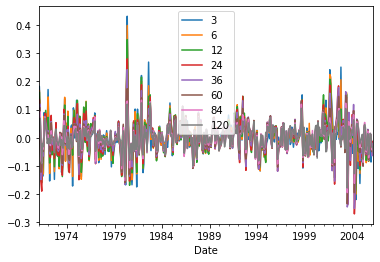

In [45]:
jb_rets.plot()

In [46]:
S = scipy.stats.skew(jb_rets[120])
S

-0.2089206498788488

In [47]:
K = scipy.stats.kurtosis(jb_rets[120], fisher=False)
K

4.393977153191133

In [48]:
JB = (jb_rets.shape[0]/6) * (S**2 + 0.25*(K-3)**2)
JB

37.41382457876969

In [49]:
cdf = scipy.stats.chi2.cdf(JB, 2)
cdf

0.9999999924891132

In [50]:
p = 1-cdf

In [51]:
p

7.510886801398442e-09